# NHL Draft dataset
# Exploratory data analysis
# Records: 
## Most Goals by a Rookie in a Single Season
This notebook presents Exploratory Data Analysis performed on NHL Records data obtained from NHL Records API Records endpoint.
### Data collection summary
Dataset generated from a JSON received from the NHL Records API, contains response to the request for all draft records.

For details, see notebook `notebooks/feature_extraction/nhl_api.ipynb`.

## Preparations
### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from time import time
import sys
import os
sns.set()

In [2]:
os.chdir('Documents/repos/nhl_draft/')
sys.path.append('src')
os.listdir()

['.git',
 '.gitattributes',
 '.gitignore',
 '.idea',
 'data',
 'design',
 'main.py',
 'models',
 'notebooks',
 'README.md',
 'requirements.txt',
 'src']

In [3]:
from plot_utils import plot_regplot

### Load data

In [4]:
rec_name = 'most-goals-rookie-one-season'
rec_file = 'data/nhl_api/records/records_main.csv'
df_rec = pd.read_csv(rec_file)
mask = df_rec['descriptionKey'] == rec_name
name = df_rec.loc[mask, 'description'].values[0]
print("----- NHL Records\n---", name, '\n')

file = 'data/nhl_api/records/' + \
       rec_name + '.csv'
t = time()
df = pd.read_csv(file)
elapsed = time() - t
print("----- DataFrame with NHL Draft Data loaded"
      "\nin {0:.2f} seconds".format(elapsed) + 
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) + 
      "\n-- Column names:\n", df.columns)

----- NHL Records
--- Most Goals, Rookie, Season 

----- DataFrame with NHL Draft Data loaded
in 0.10 seconds
with 3,377 rows
and 35 columns
-- Column names:
 Index(['activePlayer', 'assists', 'assistsPerGpMin20', 'firstGoals',
       'firstName', 'fiveGoalGames', 'fourGoalGames', 'gameWinningGoals',
       'gamesInSchedule', 'gamesPlayed', 'goals', 'goalsPerGpMin20',
       'goalsPerGpMin50', 'id', 'lastName', 'overtimeAssists', 'overtimeGoals',
       'overtimePoints', 'penalties', 'penaltyMinutes', 'playerId', 'points',
       'pointsPerGpMin50', 'positionCode', 'powerPlayGoals', 'rookieFlag',
       'seasonId', 'sevenGoalGames', 'shorthandedGoals', 'shots',
       'sixGoalGames', 'teamAbbrevs', 'teamNames', 'threeGoalGames',
       'threeOrMoreGoalGames'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377 entries, 0 to 3376
Data columns (total 35 columns):
activePlayer            3377 non-null bool
assists                 3377 non-null int64
assistsPerGpMin20       731 non-null float64
firstGoals              3377 non-null int64
firstName               3377 non-null object
fiveGoalGames           308 non-null float64
fourGoalGames           308 non-null float64
gameWinningGoals        3377 non-null int64
gamesInSchedule         3377 non-null int64
gamesPlayed             3377 non-null int64
goals                   3377 non-null int64
goalsPerGpMin20         340 non-null float64
goalsPerGpMin50         4 non-null float64
id                      3377 non-null int64
lastName                3377 non-null object
overtimeAssists         3377 non-null int64
overtimeGoals           3377 non-null int64
overtimePoints          3377 non-null int64
penalties               3377 non-null int64
penaltyMinutes          3377 non-null int64
playerId 

## Exploratory Data Analysis

### Distribution of points

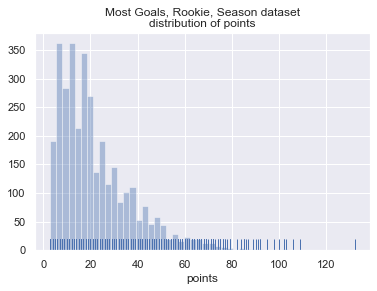

In [11]:
stat = 'points'
ax = sns.distplot(df[stat], kde=False, rug=True)
ax.set_title(name + ' dataset'
             '\ndistribution of ' + stat);

### Assists directly contribute to points
As expected, there appears to be a **_strong positive correlation_** between the number of **assists** and the number of **points** a player has, as assists are directly counted towards points.

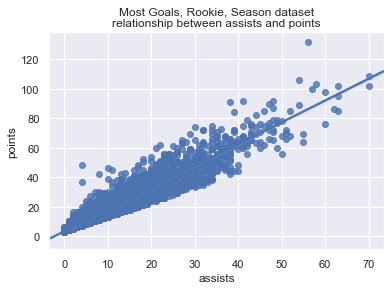

In [7]:
stat1 = 'assists'
stat2 = 'points'
plot_regplot(df, stat1, stat2, name=name)

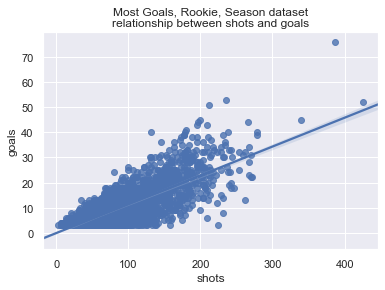

In [6]:
stat1 = 'shots'
stat2 = 'goals'
plot_regplot(df, stat1, stat2, name=name)

In [ ]:
stat1 = 'shots'
stat2 = 'goals'
ax = sns.regplot(data=df, x=stat1, y=stat2)
ax.set_title(name + 
             '\nrelationship between ' +
             stat1 + ' and ' + stat2);

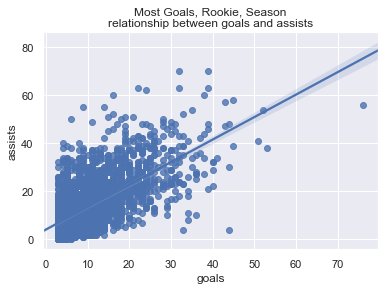

In [27]:
stat1 = 'goals'
stat2 = 'assists'
ax = sns.regplot(data=df, x=stat1, y=stat2)
ax.set_title(name + 
             '\nrelationship between ' +
             stat1 + ' and ' + stat2);